# Mathematical Underpinnings - Lab 3

  - A set $S_n = \{x_1, x_2, \ldots, x_n\}$ is **shattered** by a class $\mathcal{C}$ (or $\mathcal{C}$ shatters $S_n$) if $|\{S_n \cap c: c \in \mathcal{C}\}| = 2^n$.

  - **Shattering coefficient** of $\mathcal{C}$ is a number such that $\mathcal{S}_{\mathcal{C}}(n) = \max_{S_n} |\{S_n \cap c: c \in \mathcal{C}\}|$.

  - **Vapnik–Chervonenkis** dimension of $\mathcal{C}$ is $VC(\mathcal{C}) = \min_n \{n: \mathcal{S}_{\mathcal{C}}(n) < 2^n\}$.

*What to do if we have a class of functions $\mathcal{F}$ instead of a set of subsets $\mathcal{C}$*

  - **Subgraph** of a function $f$ is defined as $\textrm{Subgraph}(f) = \{x: f(x) \leq 0\}$.

  - Then $\mathcal{C}$ from the above definitions is defined as $\mathcal{C} = \{\textrm{Subgraph}(f): f \in \mathcal{F}\}$

  - **Example** for linear decision boundaries in $\mathbb{R}^2$: 
  
      A function: $f_b(x) = f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2}$
      
      A hyperplane (in $\mathbb{R}^2$ a line): $f_b(x^{1}, x^{2}) = b^{0} + b^{1}x^{1} + b^{2}x^{2} = 0$

      $\textrm{Subgraph}(f_b) = \{\textrm{A half space bounded by a hyperplane given above}\}$

      A family of functions: $\mathcal{F} = \{f_b: b \in \mathbb{R}^3\}$
  
      $\mathcal{C} = \{\textrm{All half spaces separated by all hyperplanes}\}$

## Task 1

### a)

Facts from the lecture:

  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) \leq d+2$.
  - If $\mathcal{F}_{a,b} = \{f: f(x) = a'x +b\}$ (a family of linear functions in $\mathbb{R}^d$), then $VC(\mathcal{F}_{a,b}) = d+1$.

Of course the second implies the first fact, but both are given as proving inequality is simpler (and we repeat what exactly was on the lecture).


*Pictures on paper*

### b)

In [1]:
from sklearn.svm import SVC
from itertools import combinations_with_replacement, permutations
import numpy as np

In [2]:
S_n = np.array([[1,2], [2,1], [1,1]])
list(combinations_with_replacement([0,1], len(S_n)))[1:-1]

[(0, 0, 1), (0, 1, 1)]

In [3]:
# # S_n is an array (n) x (d). In rows are point in R^d and there are n of them
def is_shattered(S_n):
    Ys = list(combinations_with_replacement([0,1], len(S_n)))[1:-1]
    for Y in Ys:
        for y in permutations(Y):
            model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5).fit(S_n, y)
            prediction = model.predict(S_n)
            if not np.all(prediction == y):
                return False
    return True

In [4]:
S_n = np.array([[1,2], [2,1], [1,1], [2,2]])
is_shattered(S_n)

False

### c)

In [5]:
import matplotlib.pyplot as plt

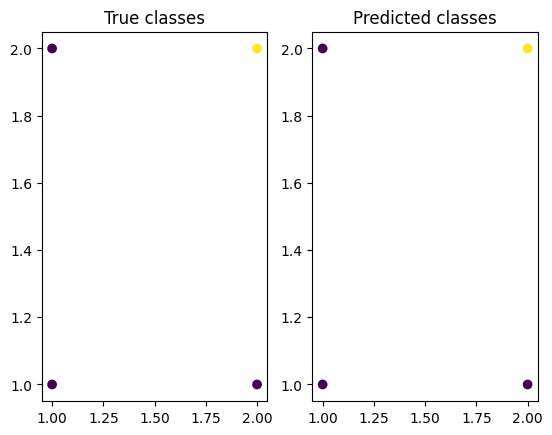

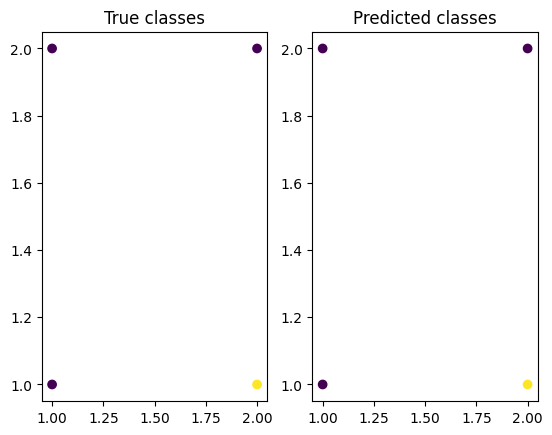

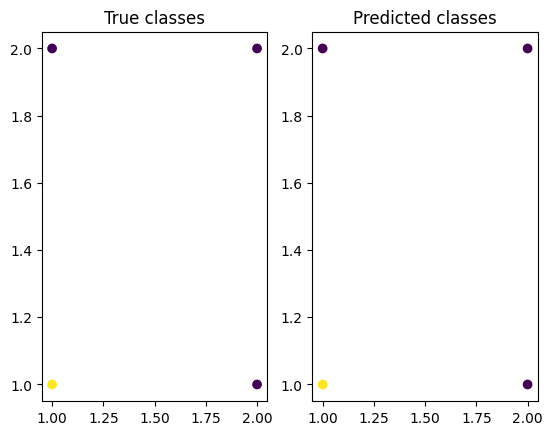

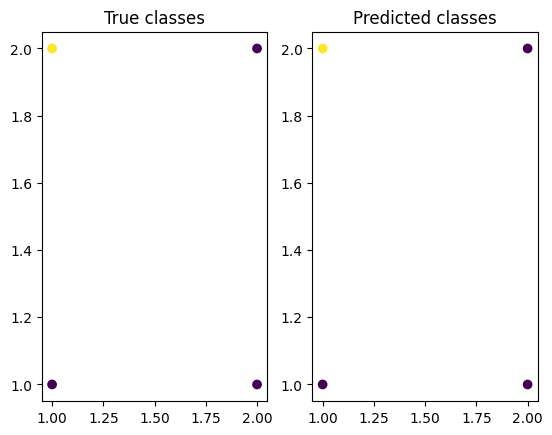

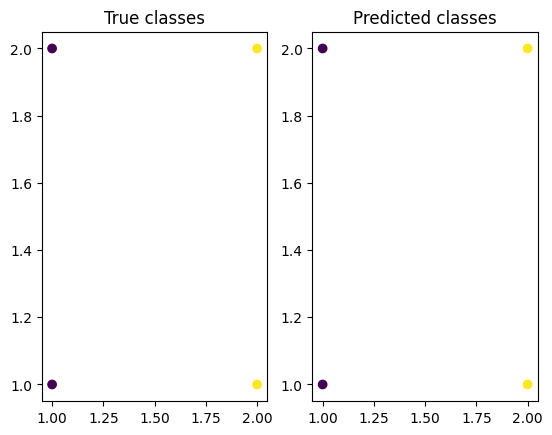

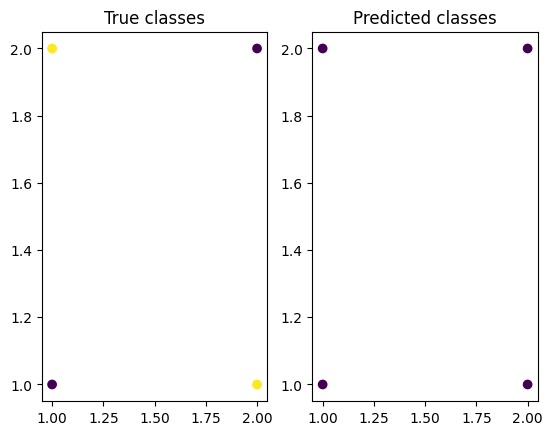

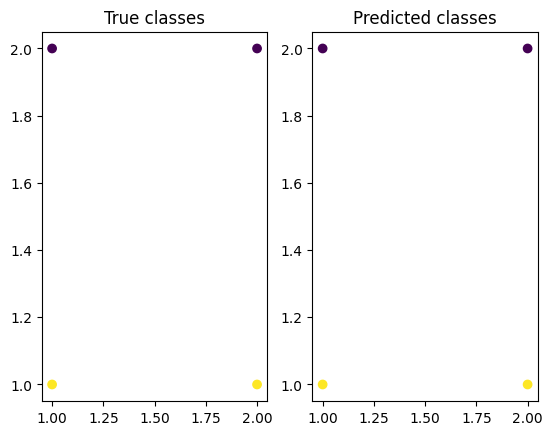

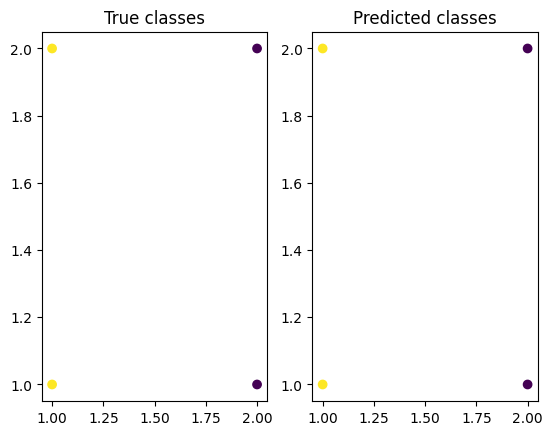

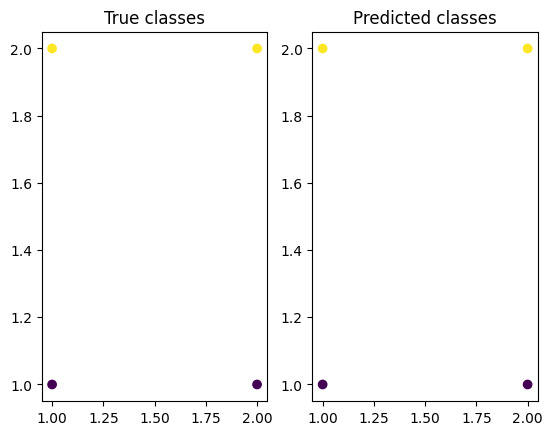

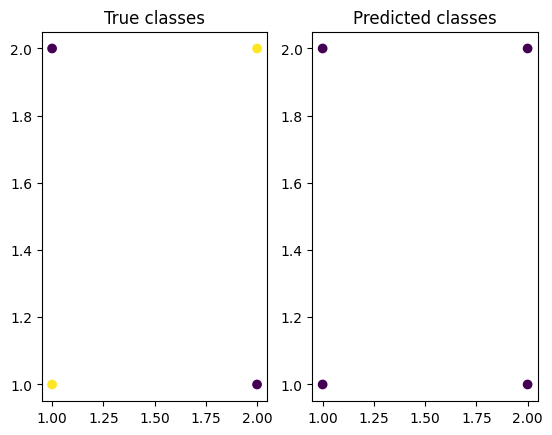

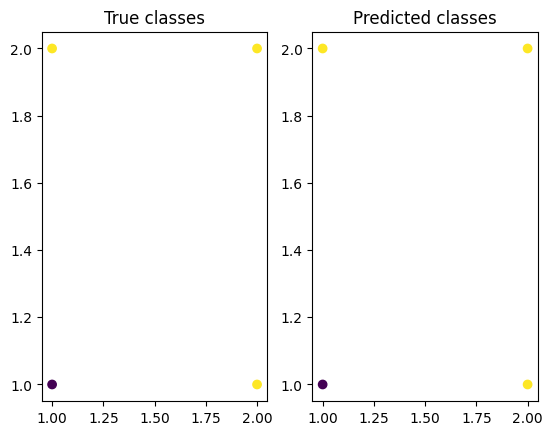

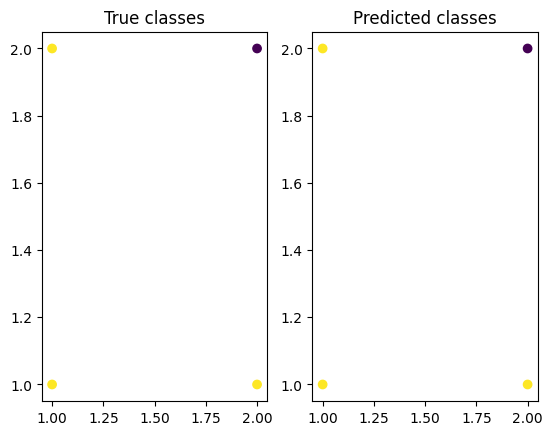

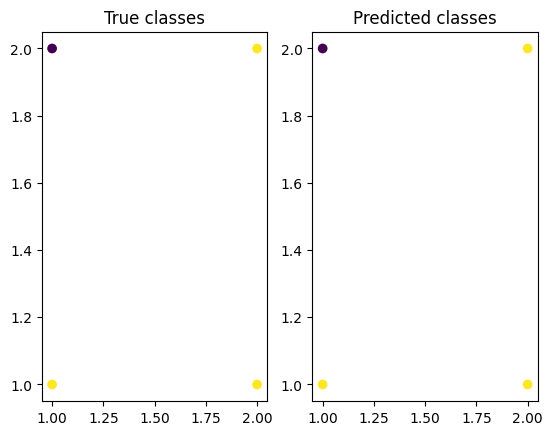

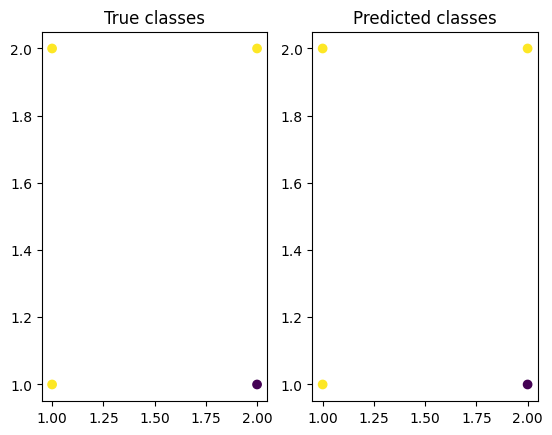

In [6]:
S_n = np.array([[1,2], [2,1], [1,1], [2,2]])
Ys = list(combinations_with_replacement([0,1], len(S_n)))[1:-1]
for Y in Ys:
    for y in set(list(permutations(Y))):
        fig, ax = plt.subplots(ncols=2, nrows=1)
        model = SVC(C=10000, shrinking=False, kernel='linear', tol=1e-5).fit(S_n, y)
        prediction = model.predict(S_n)
        ax[0].scatter(S_n[:,0], S_n[:,1], c=y)
        ax[0].set_title('True classes')
        ax[1].scatter(S_n[:,0], S_n[:,1], c=prediction)
        ax[1].set_title('Predicted classes')
        plt.show()

### d)

In [16]:
from numpy.random import default_rng
rng = default_rng()
ns = []
dims = list(range(2,4))
for d in dims:
    n=0
    shattered = True
    while shattered:
        n+=1
        was_shattered = False
        for i in range(50):
            sample = rng.multivariate_normal(np.zeros(d), np.diag(np.ones(d)), n)
            was_shattered = is_shattered(sample)
            if was_shattered:
                break
        shattered = was_shattered
    ns.append(n)

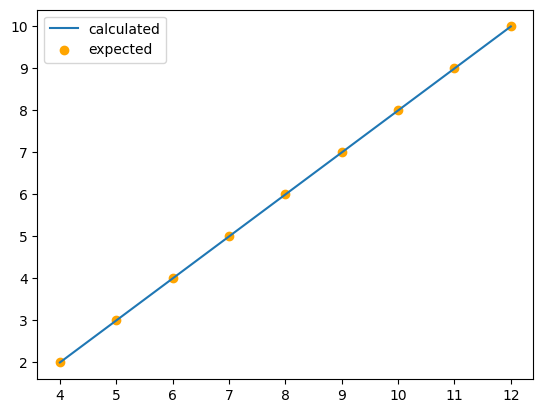

In [12]:
plt.plot(range(4,13), dims, label='calculated')
plt.scatter(list(range(4,13)), dims, label='expected', c='orange')
plt.legend()
plt.show()

### e)

In [ ]:
# A hint: change a kernel in SVM
#model = SVC(C=10000, shrinking=False, kernel='rbf', tol=1e-5).fit(S_n, y)